# ПРОГНОЗИРОВАНИЕ №8.5 - ПРИБЫЛЬ (КЛАССИФИКАЦИЯ на половине данных)

In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqv_r4gm3
  JVM stdout: /tmp/tmpqv_r4gm3/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpqv_r4gm3/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,10 secs
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,2 months and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_l1p57n
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.926 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [11]:
import h2o
from h2o.exceptions import H2OValueError
from h2o.frame import H2OFrame
from h2o.model import ModelBase
from h2o.model.extensions import has_extension
from h2o.utils.compatibility import *  # NOQA
from h2o.utils.typechecks import assert_is_type
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [2]:
#file = '/content/drive/MyDrive/Colab Notebooks/Diplom/df4eda2clean2.csv'
file = 'df2prep4regressionV8test.csv'
df = h2o.import_file(file)
df = df.drop('C1')
#df = df.drop('Revenue_cat')
df = df.drop('Revenue_T')
df = df.drop('abc_xyz_class')
df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Zip,Units,Manufacturer,MonthNo,Model_id_number,CategoryInSegment,Revenue_cat
75965,1,Natura,10,40,UrbanConvenience,Revenue_cat #31
25705,1,Aliqui,2,4,RuralProductivity,Revenue_cat #6
53704,1,Currus,4,21,UrbanConvenience,Revenue_cat #15
80304,1,Aliqui,12,21,YouthYouth,Revenue_cat #6
35077,1,Currus,8,24,UrbanExtreme,Revenue_cat #31
75075,1,Currus,11,17,UrbanConvenience,Revenue_cat #20
43940,1,Pirum,1,34,UrbanExtreme,Revenue_cat #29
71360,1,Natura,10,39,UrbanConvenience,Revenue_cat #19
66066,1,VanArsdel,1,39,UrbanConvenience,Revenue_cat #36
85023,1,Aliqui,5,12,RuralProductivity,Revenue_cat #27


In [3]:
train, valid, unseen = df.split_frame(ratios=[0.7, 0.15])

In [4]:
train

Zip,Units,Manufacturer,MonthNo,Model_id_number,CategoryInSegment,Revenue_cat
25705,1,Aliqui,2,4,RuralProductivity,Revenue_cat #6
80304,1,Aliqui,12,21,YouthYouth,Revenue_cat #6
35077,1,Currus,8,24,UrbanExtreme,Revenue_cat #31
75075,1,Currus,11,17,UrbanConvenience,Revenue_cat #20
43940,1,Pirum,1,34,UrbanExtreme,Revenue_cat #29
71360,1,Natura,10,39,UrbanConvenience,Revenue_cat #19
66066,1,VanArsdel,1,39,UrbanConvenience,Revenue_cat #36
85023,1,Aliqui,5,12,RuralProductivity,Revenue_cat #27
94087,1,Natura,6,14,UrbanExtreme,Revenue_cat #34
32825,1,Aliqui,11,7,UrbanConvenience,Revenue_cat #28


In [5]:
valid

Zip,Units,Manufacturer,MonthNo,Model_id_number,CategoryInSegment,Revenue_cat
75965,1,Natura,10,40,UrbanConvenience,Revenue_cat #31
20134,1,Currus,10,2,UrbanConvenience,Revenue_cat #33
34983,1,Pirum,4,22,UrbanExtreme,Revenue_cat #24
92703,1,Currus,5,33,RuralProductivity,Revenue_cat #4
37415,1,Pirum,5,14,UrbanModeration,Revenue_cat #37
85242,2,Pirum,6,32,RuralProductivity,Revenue_cat #13
89508,1,Natura,3,79,RuralProductivity,Revenue_cat #2
58011,1,Aliqui,10,3,RuralProductivity,Revenue_cat #6
48097,1,Aliqui,3,52,RuralProductivity,Revenue_cat #1
89403,1,VanArsdel,6,43,UrbanModeration,Revenue_cat #45


In [6]:
unseen

Zip,Units,Manufacturer,MonthNo,Model_id_number,CategoryInSegment,Revenue_cat
53704,1,Currus,4,21,UrbanConvenience,Revenue_cat #15
50214,1,Currus,6,17,RuralProductivity,Revenue_cat #8
24293,1,VanArsdel,11,43,UrbanModeration,Revenue_cat #45
46143,1,Natura,8,79,RuralProductivity,Revenue_cat #3
92808,1,Natura,10,3,UrbanModeration,Revenue_cat #48
95391,1,VanArsdel,4,75,UrbanModeration,Revenue_cat #47
36078,1,Aliqui,9,11,MixAll Season,Revenue_cat #15
37643,1,Aliqui,9,2,UrbanConvenience,Revenue_cat #24
76904,1,Pirum,4,27,UrbanExtreme,Revenue_cat #16
10024,1,VanArsdel,11,1,UrbanConvenience,Revenue_cat #41


# Тренировка модели

In [15]:
from h2o.estimators import H2OGradientBoostingEstimator

response_col = "Revenue_cat"

distribution = "multinomial"

predictors = ["Zip","Units","Manufacturer","MonthNo","Model_id_number", "CategoryInSegment"]

gbm = H2OGradientBoostingEstimator(nfolds=3,
                                   distribution=distribution)

gbm.train(x=predictors,
          y=response_col,
          training_frame=train,
          validation_frame=valid)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1695987519015_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 2450                        1.11438e+06            5            5            5             13            32            31.4645

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.4040250008384381
RMSE: 0.6356296097873652
LogLoss: 1.1801589805015211
Mean Per-Class Error: 0.41127150976436344
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Revenue_cat #1    Revenue_cat #10    Revenue_cat #11    Revenue_cat #12    Revenue_cat #13    Revenue_cat #14    Revenue_cat #15    Revenue_cat #16    Revenue_cat #17    Revenue_cat #18    Revenue_cat #19    Revenue_cat #2    Revenue_cat #20    Revenue_cat #21    Revenue_cat #22    Revenue_cat #23    Revenue_cat #24    Revenue_cat #25    Revenue_cat #26    Revenue_cat #27    Revenue_cat #28    Revenue_cat #29    Revenue_cat #3    Revenue_cat #30    Revenue_cat #31    Revenue_cat #32    Revenue_cat #33    Revenue_cat #34    Revenue_cat #35    Revenue_cat #36    Revenue_cat #37    Revenue_cat #38    Revenue_cat #39    Revenue_cat #4    Revenue_cat #40    Revenue_cat #41    Revenue_cat #42    Revenue_cat #43    Revenue_cat #44    Revenue_cat #45    Revenue_cat #46    Revenue_cat #47    Revenue_cat #48    Revenue_cat #49    Revenue_cat #5    Revenue_cat #6    Revenue_cat #7    Revenue_cat #8    Revenue_cat #9    Error                  Rate
----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  ----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  ----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  ----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  ----------------  ----------------  ----------------  ----------------  ----------------  ---------------------  -----------------
8065.0            0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0               0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0               0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0               0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0               0.0               0.0               1.0   

In [16]:
confusion_matrix = gbm.confusion_matrix(train)
confusion_matrix

Revenue_cat #1,Revenue_cat #10,Revenue_cat #11,Revenue_cat #12,Revenue_cat #13,Revenue_cat #14,Revenue_cat #15,Revenue_cat #16,Revenue_cat #17,Revenue_cat #18,Revenue_cat #19,Revenue_cat #2,Revenue_cat #20,Revenue_cat #21,Revenue_cat #22,Revenue_cat #23,Revenue_cat #24,Revenue_cat #25,Revenue_cat #26,Revenue_cat #27,Revenue_cat #28,Revenue_cat #29,Revenue_cat #3,Revenue_cat #30,Revenue_cat #31,Revenue_cat #32,Revenue_cat #33,Revenue_cat #34,Revenue_cat #35,Revenue_cat #36,Revenue_cat #37,Revenue_cat #38,Revenue_cat #39,Revenue_cat #4,Revenue_cat #40,Revenue_cat #41,Revenue_cat #42,Revenue_cat #43,Revenue_cat #44,Revenue_cat #45,Revenue_cat #46,Revenue_cat #47,Revenue_cat #48,Revenue_cat #49,Revenue_cat #5,Revenue_cat #6,Revenue_cat #7,Revenue_cat #8,Revenue_cat #9,Error,Rate
8065.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0001240,"1 / 8,066"
0.0,4318.0,203.0,1.0,8.0,1.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,263.0,1177.0,0.2849810,"1,721 / 6,039"
0.0,1530.0,5785.0,129.0,134.0,10.0,9.0,0.0,1.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,170.0,0.2596621,"2,029 / 7,814"
0.0,1108.0,1336.0,1572.0,1287.0,187.0,35.0,43.0,2.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,56.0,16.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27.0,0.0,380.0,0.7446394,"4,584 / 6,156"
0.0,279.0,819.0,293.0,5335.0,370.0,23.0,2.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,20.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,4.0,12.0,0.2574809,"1,850 / 7,185"
0.0,42.0,1313.0,158.0,505.0,4609.0,196.0,64.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,7.0,0.0,0.3366436,"2,339 / 6,948"
0.0,12.0,354.0,94.0,11.0,846.0,5369.0,872.0,36.0,3.0,0.0,0.0,1.0,50.0,0.0,2.0,98.0,2.0,0.0,5.0,3.0,9.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,2.0,49.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,21.0,91.0,76.0,0.3346140,"2,700 / 8,069"
0.0,0.0,3.0,6.0,4.0,114.0,870.0,4014.0,426.0,35.0,0.0,0.0,0.0,2.0,2.0,1.0,2.0,3.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,83.0,0.0,0.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,66.0,18.0,4.0,139.0,0.3225316,"1,911 / 5,925"
0.0,21.0,1.0,71.0,59.0,12.0,465.0,1059.0,3955.0,916.0,0.0,0.0,274.0,38.0,21.0,0.0,29.0,41.0,1.0,1.0,0.0,4.0,0.0,0.0,10.0,0.0,0.0,34.0,2.0,1.0,60.0,2.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,17.0,1.0,0.0,47.0,0.4479341,"3,209 / 7,164"
0.0,0.0,20.0,95.0,0.0,52.0,57.0,112.0,1238.0,6306.0,340.0,0.0,417.0,40.0,85.0,93.0,83.0,1.0,14.0,2.0,3.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,26.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,1.0,5.0,0.3030504,"2,742 / 9,048"


In [17]:
hit_ratio_table = gbm.hit_ratio_table() # <- Default: return training metrics
hit_ratio_table

k,hit_ratio
1,0.5998676
2,0.8135202
3,0.8996897
4,0.9370292
5,0.9569330
6,0.9698501
7,0.97839
8,0.9833115
9,0.9859179
10,0.9878712


In [18]:
hit_ratio_table1 = gbm.hit_ratio_table(train=True,
                                       valid=True,
                                       xval=True)
hit_ratio_table1

{'train': Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.599868
2    0.81352
3    0.89969
4    0.937029
5    0.956933
6    0.96985
7    0.97839
8    0.983312
9    0.985918
10   0.987871,
 'valid': Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.590404
2    0.805591
3    0.893388
4    0.932173
5    0.953529
6    0.967514
7    0.97616
8    0.980799
9    0.98397
10   0.986111,
 'xval': Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.591866
2    0.807346
3    0.895012
4    0.931899
5    0.952314
6    0.966005
7    0.974495
8    0.979878
9    0.983547
10   0.986206}

In [19]:
mean_per_class_error = gbm.mean_per_class_error() # <- Default: return training metric
mean_per_class_error

0.41127150976436344

In [20]:
mean_per_class_error1 = gbm.mean_per_class_error(train=True,
                                                 valid=True,
                                                 xval=True)
mean_per_class_error1

{'train': 0.41127150976436344,
 'valid': 0.42017073001749017,
 'xval': 0.4189429130376488}

In [21]:
multinomial_auc_table = gbm.multinomial_auc_table() # <- Default: return training metric
multinomial_auc_table

"AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains)."

In [22]:
multinomial_aucpr_table = gbm.multinomial_aucpr_table() # <- Default: return training metric
multinomial_aucpr_table

"AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains)."

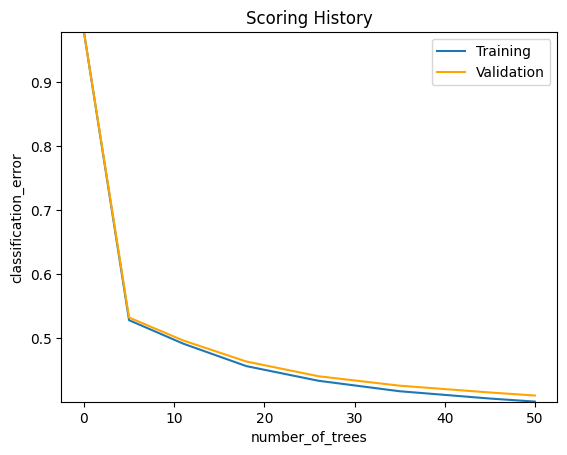

In [23]:
gbm.plot(metric="AUTO", timestep="AUTO")